In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pa
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix
import math

In [2]:
cd

C:\Users\Shilpa


In [3]:
cd Downloads

C:\Users\Shilpa\Downloads


In [4]:
# Reading the data through pandas
db = pa.read_csv("column_2c.csv")

In [5]:
# Dropping off the unwanted index
db.drop("id",axis=1,inplace=True)
db.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
db.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


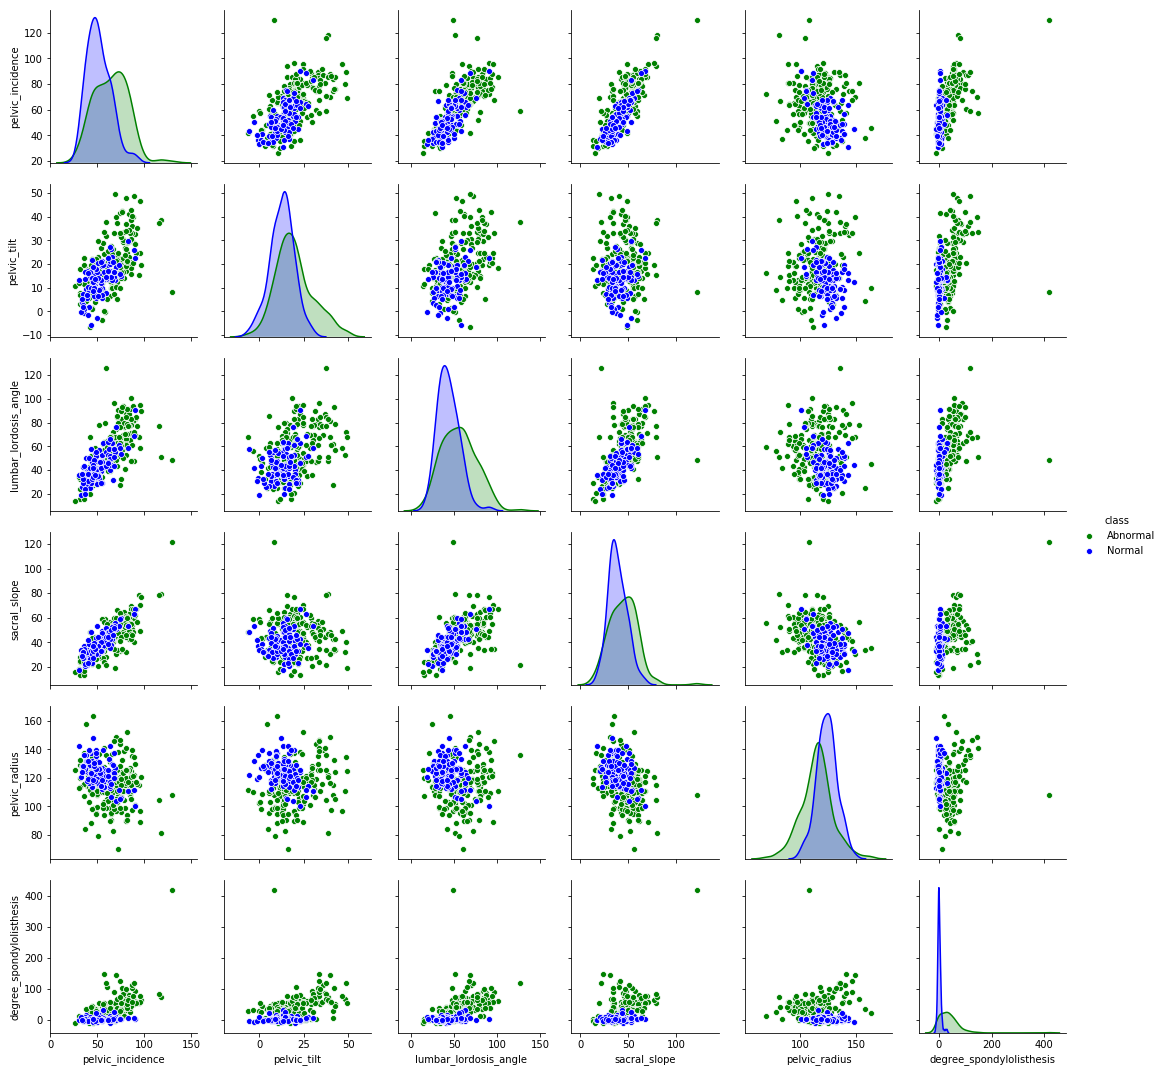

In [7]:
#b(i).Scatter plots
p=sb.pairplot(db,kind='scatter',hue='class',palette={'b','g'})

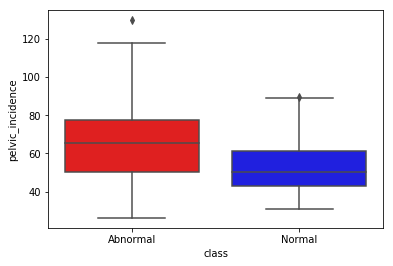

In [8]:
#b(ii). Box plots
b1=sb.boxplot(x='class',y = "pelvic_incidence",data=db,palette={"b","r"})

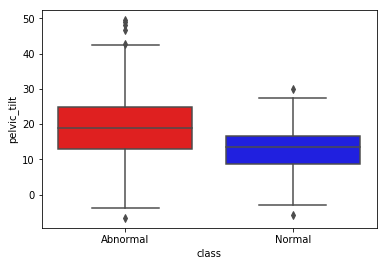

In [9]:
b2=sb.boxplot(x='class', y='pelvic_tilt',data=db,palette={"b","r"})

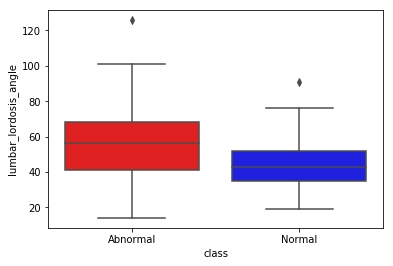

In [10]:
b3=sb.boxplot(y='lumbar_lordosis_angle', x='class',data=db,palette={"b","r"})

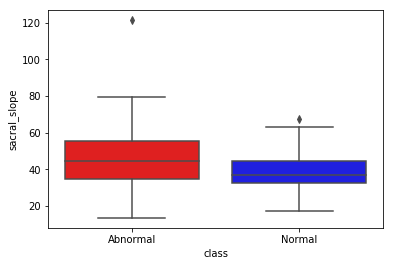

In [11]:
b4=sb.boxplot(y='sacral_slope', x='class',data=db,palette={"b","r"})

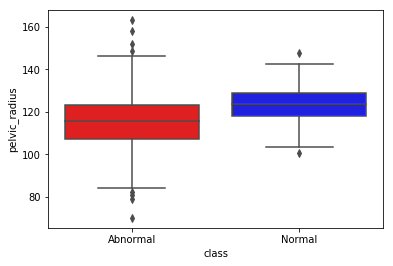

In [12]:
b5=sb.boxplot(y='pelvic_radius', x='class',data=db,palette={"b","r"})

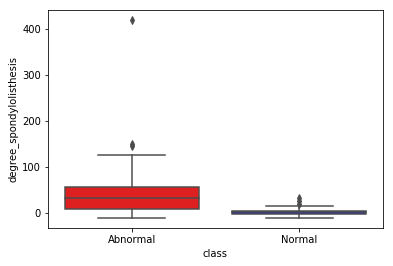

In [13]:
b6=sb.boxplot(y='degree_spondylolisthesis', x='class',data=db,palette={"b","r"})

In [14]:
normal = db[db['class']=='Normal']
abnormal = db[db['class']=='Abnormal']

In [15]:
"""b(iii). Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the 
                   training set and the rest of the data as the test set."""
train_data = pa.concat([normal[0:70],abnormal[0:140]])
train_data.reset_index(drop=True,inplace=True)
X_train = train_data[train_data.columns[0:6]]
Y_train = train_data['class']
Y_train = np.array([0 if u == 'Normal' else 1 for u in Y_train])

In [16]:
test_data = pa.concat([normal[70:],abnormal[140:]])
test_data.reset_index(drop = True, inplace=True)
X_test = test_data[test_data.columns[0:6]]
Y_test = test_data['class']
Y_test = np.array([0 if u == 'Normal' else 1 for u in Y_test])

In [17]:
print('Length_train ', len(train_data))
print('Length_test ', len(test_data))

Length_train  210
Length_test  100


In [18]:
#c(i) KNN Classifier for finding best K value with Euclidean metric
overall_train_error = []
k = 208
best_k=0
accuracy=0
train_error = {}
test_error ={}
while k>0:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
    knn.fit(X_train, Y_train)
    Y_Testpredict = knn.predict(X_test)
    score=knn.score(X_test,Y_test,sample_weight=None)
    if score > accuracy:
        accuracy = score
        best_k = k
    train_error[k] = 1 - knn.score(X_train, Y_train)
    test_error[k] = 1 - knn.score(X_test, Y_test)
    k=k-1
    
print("Best k value: ", best_k)
print("Accuracy: ", accuracy)


Best k value:  4
Accuracy:  0.94


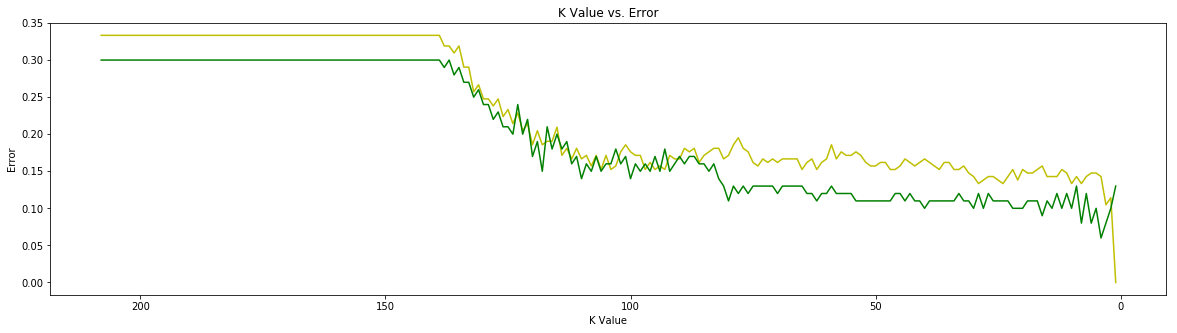

In [19]:
#c(ii). Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1} 
train_keys = []
train_errors = []
test_keys = []
test_errors = []
for key in sorted(train_error.keys()):
    train_keys.append(key)
    train_errors.append(train_error[key])
for key in sorted(test_error.keys()):
    test_keys.append(key)
    test_errors.append(test_error[key])
plt.figure(figsize=(20, 5))
plt.xlabel('K Value')
plt.ylabel('Error')
plt.title("K Value vs. Error")
plt.plot(train_keys, train_errors, color='y', label = "Train")
plt.plot(test_keys, test_errors, color = 'g', label = "Test Error")
plt.gca().invert_xaxis()

In [20]:
# Confusion Matrix
knn = KNeighborsClassifier(n_neighbors= 3, metric = 'euclidean')
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
confusion = confusion_matrix(Y_test,pred)
print("Confusion matrix: ",confusion)

Confusion matrix:  [[23  7]
 [ 1 69]]


In [21]:
# Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test,pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.91      0.99      0.95        70

   micro avg       0.92      0.92      0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



In [22]:
# True Positive and True Negative Rate
TPR = confusion[0,0] / (confusion[0,0]+confusion[0,1])
print("True positive rate: ",TPR)
TNR = confusion[1,1] / (confusion[1,0]+confusion[1,1])
print("True negative rate: ", TNR)

True positive rate:  0.7666666666666667
True negative rate:  0.9857142857142858


In [23]:
#c(iii) Finding the best test error rate
test_error_rate = {}
train_error_rate = {}
test_error_array = []
train_error_array = []
for n in range(10, 211, 10):
    test_error_array = []
    train_error_array = []
    temp_train_data = pa.concat([train_data[0:int(round(n/3))], train_data[70:70+int(round(2*n/3))]])
    temp_train_data.reset_index(drop=True,inplace=True)
    
    X_temp_train_data = np.array(temp_train_data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])
    Y_temp_train_data = np.array(temp_train_data['class'])
    Y_temp_train_data = np.array([0 if u == 'Normal' else 1 for u in Y_temp_train_data])
    
    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_temp_train_data, Y_temp_train_data)
        pred_test = knn.predict(X_test)
        test_error_array.append(1- accuracy_score(Y_test, pred_test))
        pred_train = knn.predict(X_temp_train_data)
        train_error_array.append(1- accuracy_score(Y_temp_train_data, pred_train))
    test_error_rate.update({n: min(test_error_array)})
    train_error_rate.update({n: min(train_error_array)})
print(test_error_rate)


{10: 0.25, 20: 0.18999999999999995, 30: 0.21999999999999997, 40: 0.25, 50: 0.30000000000000004, 60: 0.29000000000000004, 70: 0.29000000000000004, 80: 0.29000000000000004, 90: 0.29000000000000004, 100: 0.26, 110: 0.22999999999999998, 120: 0.17000000000000004, 130: 0.16000000000000003, 140: 0.14, 150: 0.13, 160: 0.13, 170: 0.12, 180: 0.09999999999999998, 190: 0.08999999999999997, 200: 0.08999999999999997, 210: 0.07999999999999996}


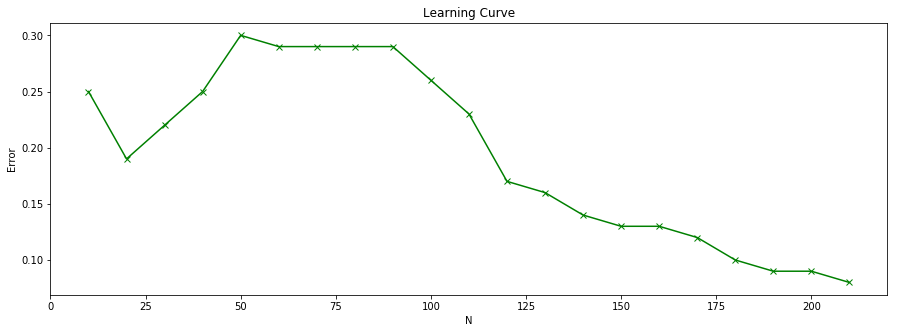

In [24]:
#c(iii) Plotting the Learning curve
plt.figure(figsize=(15, 5))
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Learning Curve")
plt.plot(range(10, 211, 10), test_error_rate.values(), color='green', marker='x')

In [25]:
#d(i)A. Minkowski distance with p=1
test_error = {}
train_error = {}
for k in range(1, 208, 5):
    if k>len(X_train):
        continue
    knn = KNeighborsClassifier(n_neighbors = k, metric = "minkowski",p=1)
    knn.fit(X_train, Y_train)
    test_error[k] = 1 - knn.score(X_test, Y_test)
    train_error[k] = 1 - knn.score(X_train, Y_train)
k = min(test_error, key = test_error.get)
k_train = min(train_error, key = train_error.get)
accuracy = 1 - test_error[k]
print("Metric : ", "Minkowski")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-k_train)

Metric :  Minkowski
K* :  1
Accuracy :  0.89
Error :  0.10999999999999999
Lowest Train Error:  0


In [26]:
#d(i)B. Minkowski distance with log(p) base 10
p_error = {}
p_error_train = {}
for p in np.arange(0.1, 1.1, 0.1):
    knn = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski", p = math.pow(10, p))
    knn.fit(X_train, Y_train)
    p_error[p] = 1 - knn.score(X_test, Y_test)
    p_error_train[p] = 1 - knn.score(X_train, Y_train)
P = min(p_error,key = p_error.get)
P_train = min(p_error_train, key = p_error_train.get)
accuracy = 1 - p_error[P]
print("Metric : ", "Minkowski")
print("K* (for Manhattan) : ", 6)
print("Best P : ", P)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-P_train)

Metric :  Minkowski
K* (for Manhattan) :  6
Best P :  0.6
Accuracy :  0.94
Error :  0.06000000000000005
Lowest Train Error:  0.0


In [27]:
#d(i)C. Chebyshev distance metric in KNN Classifier with p->inf
test_error = {}
train_error = {}
for k in range(1, 197, 1):
    knn = KNeighborsClassifier(n_neighbors = k, metric = "chebyshev")
    knn.fit(X_train, Y_train)
    test_error[k] = 1 - knn.score(X_test, Y_test)
    train_error[k] = 1 - knn.score(X_train, Y_train)
k = min(test_error, key = test_error.get)
k_train = min(train_error, key=train_error.get)
accuracy = 1 - test_error[k]
print("Metric : ", "Chebyshev")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-k_train)

Metric :  Chebyshev
K* :  2
Accuracy :  0.94
Error :  0.06000000000000005
Lowest Train Error:  0


In [28]:
#d(ii). Mahalanobis distance metric
test_error = {}
train_error = {}
covarience_matrix = np.cov(X_train)
for k in range(1,197, 1):
    knn = KNeighborsClassifier(algorithm = "brute", n_neighbors = k, metric='mahalanobis', metric_params={'V': covarience_matrix})
    knn.fit(X_train, Y_train)
    test_error[k] = 1 - knn.score(X_test, Y_test)
    train_error[k] = 1 - knn.score(X_train, Y_train)
k = min(test_error, key = test_error.get)
k_train = min(train_error, key = train_error.get)
accuracy = 1 - test_error[min(test_error)]
print("Metric : ", "Mahalanobis")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-k_train)

Metric :  Mahalanobis
K* :  3
Accuracy :  0.84
Error :  0.16000000000000003
Lowest Train Error:  0


In [29]:
#e(1). Weighted Euclidean
test_error = {}
train_error = {}
for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = "euclidean")
    knn.fit(X_train, Y_train)
    test_error[k] = 1 - knn.score(X_test,Y_test)
    train_error[k] = 1 - knn.score(X_train, Y_train)
k = min(test_error, key=test_error.get)
k_train = min(train_error, key=train_error.get)
accuracy =  1 - test_error[k]
print("Metric : ", "Euclidean Weighted")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-k_train)

Metric :  Euclidean Weighted
K* :  6
Accuracy :  0.9
Error :  0.09999999999999998
Lowest Train Error:  0


In [30]:
#e(2). Weighted Chebyshev
test_error={}
train_error={}
for k in range(1,197,5):
    nn = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev', p = 2)
    nn.fit(X_train,Y_train)
    test_error[k] = 1 - nn.score(X_test,Y_test)
    train_error[k]= 1 - nn.score(X_train,Y_train)
k = min(test_error,key = test_error.get)
k_train = min(train_error,key=train_error.get)
accuracy = 1 - test_error[k]
print("Metric : ", "Weighted Chebyshev")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
print("Lowest Train Error: ", 1-k_train)

Metric :  Weighted Chebyshev
K* :  16
Accuracy :  0.92
Error :  0.07999999999999996
Lowest Train Error:  0


In [31]:
#e(3). Weighted Manhattan
test_error = {}
train_error = {}
for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = "minkowski", p = 1)
    knn.fit(X_train,Y_train)
    test_error[k] = 1 - knn.score(X_test,Y_test)
    train_error[k]= 1 - knn.score(X_train,Y_train)
k = min(test_error, key=test_error.get)
k_train = min(train_error, key=train_error.get)
accuracy =  1 - test_error[k]
print("Metric : ", "Weighted Manhattan")
print("K* : ", k)
print("Accuracy : ", accuracy)
print("Error : ", 1 - accuracy)
#Lowest Train Error
print("Lowest Train Error: ", 1-k_train)

Metric :  Weighted Manhattan
K* :  26
Accuracy :  0.9
Error :  0.09999999999999998
Lowest Train Error:  0


In [32]:
#f. The lowest training error rate obtained is 0.0